### Data Cleaning 

In [1]:
%matplotlib inline

In [2]:
# Import dependencies
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st


In [6]:
# Read the mouse data and the study results
mouse_metadata_path = "../Resources/Mouse_metadata.csv"
study_results_path = "../Resources/Study_results.csv"
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

In [8]:
# Display the mouse data
mouse_metadata

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g)
0,k403,Ramicane,Male,21,16
1,s185,Capomulin,Female,3,17
2,x401,Capomulin,Female,16,15
3,m601,Capomulin,Male,22,17
4,g791,Ramicane,Male,11,16
...,...,...,...,...,...
244,z314,Stelasyn,Female,21,28
245,z435,Propriva,Female,12,26
246,z581,Infubinol,Female,24,25
247,z795,Naftisol,Female,13,29


In [9]:
# Display the study data
study_results

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,b128,0,45.000000,0
1,f932,0,45.000000,0
2,g107,0,45.000000,0
3,a457,0,45.000000,0
4,c819,0,45.000000,0
...,...,...,...,...
1888,r944,45,41.581521,2
1889,u364,45,31.023923,3
1890,p438,45,61.433892,1
1891,x773,45,58.634971,4


In [11]:
# Combine the data into a single dataset and display it
combined_df=pd.merge(mouse_metadata, study_results ,how='outer',on="Mouse ID")
combined_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [12]:
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
combined_df[combined_df.duplicated(subset=['Mouse ID','Timepoint'])]

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
909,g989,Propriva,Female,21,26,0,45.000000,0
911,g989,Propriva,Female,21,26,5,47.570392,0
913,g989,Propriva,Female,21,26,10,49.880528,0
915,g989,Propriva,Female,21,26,15,53.442020,0
917,g989,Propriva,Female,21,26,20,54.657650,1


In [13]:
# Optional: Create a DataFrame for all the data for the duplicate mouse ID. 
combined_df.loc[combined_df["Mouse ID"]=="g989"]

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [14]:
# Create a clean DataFrame by dropping any rows that contain duplicate `Mouse ID`. 
clean_df=combined_df.loc[combined_df["Mouse ID"]!="g989"]
clean_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


### Data Analysis and Visualization

In [28]:
# Create a DataFrame that has the greatest time point for each mouse
#  Reset the index of the DataFrame
# Display the DataFrame 
max_timepoint_df = pd.DataFrame(clean_df.groupby('Mouse ID')['Timepoint'].max().sort_values()).reset_index().rename(columns={'Timepoint':'Max Timepoint'})
max_timepoint_df

,Mouse ID,Max Timepoint
0,b447,0
1,x226,0
2,f932,0
3,x336,0
4,l872,0
...,...,...
243,k894,45
244,l471,45
245,l509,45
246,i177,45


In [18]:
# Merge the newly created `.max()` DataFrame with the cleaned DataFrame.
max_tp_merged_df = pd.merge(clean_df, max_timepoint_df, on='Mouse ID')

In [20]:
mouse_metadata['Drug Regimen'].unique()

array(['Ramicane', 'Capomulin', 'Infubinol', 'Placebo', 'Ceftamin',
       'Stelasyn', 'Zoniferol', 'Ketapril', 'Propriva', 'Naftisol'],
      dtype=object)

In [23]:
# Create a list that has the final tumor volume of all mice in the study across all drug regimens.
# 1. Create a list with all 10 drug regimens.
treatment_list=['Ramicane', 'Capomulin', 'Infubinol', 'Placebo', 'Ceftamin','Stelasyn', 'Zoniferol', 'Ketapril', 'Propriva', 'Naftisol']
# 2. Create a empty list to fill with the tumor volume data
treatment_vols = []
# 3. Isolate (filter) each mice on each drug to collect their tumor volume.
for drug in treatment_list:
    drug_df = max_tp_merged_df.loc[max_tp_merged_df['Drug Regimen'] == drug]
    max_tp_drug_df = drug_df.loc[max_tp_merged_df['Timepoint'] == max_tp_merged_df['Max Timepoint']]
     #Locate the rows which match the drug and get the final tumor volumes of all mice
    values = max_tp_drug_df['Tumor Volume (mm3)']
     # Append the outcome to the empty list previously created.
    treatment_vols.append(values)

In [ ]:
plt.boxplot(treatment_vols, flierprops=dict(markeredgecolor='red'))
# Add title and labels to boxplot
plt.title('Final Tumor Volume by Drug')
plt.ylabel('Final Tumor Volume (mm3)')
plt.xticks([1, 2, 3, 4], ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin'])
plt.show()

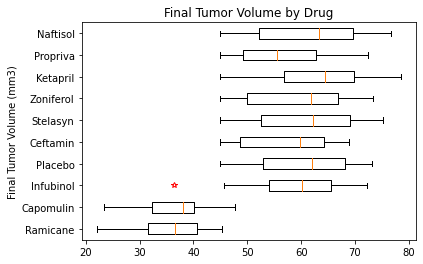

In [56]:
# Create an annotated boxplot that visualizes the final tumor volume of all mice in the study across all drug regimens.
# Add title and labels to boxplot
# Define a custom shape for all outliers in the visualization
# Create horizontal box and whisker plot
plt.boxplot(treatment_vols, flierprops=dict(markeredgecolor='red', marker='*'), vert=0)
plt.title('Final Tumor Volume by Drug')
plt.ylabel('Final Tumor Volume (mm3)')
plt.yticks([1, 2, 3, 4, 5, 6, 7, 8, 9, 10],['Ramicane', 'Capomulin', 'Infubinol', 'Placebo', 'Ceftamin','Stelasyn', 'Zoniferol', 'Ketapril', 'Propriva', 'Naftisol'])
plt.show()